In [117]:
from src import model as mdl
from src import custom as cm

In [2]:
import pandas as pd
import numpy as np
from joblib import load
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
user_fac = pd.read_csv('../data/processed/user_factors.csv', index_col = 'id')

In [4]:
user_fac.head()

,1,2,3,4,5,6,7,8,9,10,...,33,34,35,36,37,38,39,40,41,42
id,,,,,,,,,,,,,,,,,,,,,
1,-0.380470,0.103641,0.310486,0.078450,0.129363,-0.033363,0.030401,-0.360824,-0.213137,0.370407,...,0.022118,-0.480875,0.194733,0.479119,0.328390,-0.123725,-0.188246,-0.525000,-0.133443,-0.167593
2,-0.226508,0.167774,0.536940,0.235142,-0.036765,0.118235,0.024486,-0.449235,-0.145772,0.214047,...,-0.048399,-0.314272,0.170148,0.567598,0.492936,-0.072118,-0.063404,-0.715515,0.038176,-0.056638
3,-0.240955,0.179579,0.439598,0.231143,0.003269,0.110166,0.018843,-0.457156,-0.184155,0.168279,...,-0.037431,-0.375902,0.142993,0.607431,0.525451,-0.006926,-0.018648,-0.715832,0.011471,-0.136575
4,-0.271722,0.041331,0.368844,-0.016227,0.102699,0.047941,0.020815,-0.335555,-0.272367,0.089399,...,0.136988,-0.530468,0.179969,0.527210,0.440110,0.124539,-0.082171,-0.663929,-0.065500,-0.327186
5,-0.368851,0.104798,0.349379,0.013516,0.070510,0.036399,-0.017281,-0.401808,-0.266340,0.203034,...,0.118943,-0.581576,0.247609,0.590982,0.318466,0.053089,-0.191376,-0.671003,-0.065487,-0.266448


In [5]:
item_fac = pd.read_csv('../data/processed/item_factors_unstacked.csv', index_col = 'id')

In [74]:
item_fac.head()

,1,2,3,4,5,6,7,8,9,10,...,33,34,35,36,37,38,39,40,41,42
id,,,,,,,,,,,,,,,,,,,,,
1,-0.339038,0.133855,0.431191,0.170945,0.060187,0.008598,0.054160,-0.401662,-0.193391,0.355262,...,-0.052306,-0.392383,0.141144,0.529034,0.494720,-0.141302,-0.088752,-0.589613,-0.088734,-0.093626
2,-0.206917,0.183585,0.479785,0.222415,-0.039014,0.109340,0.026195,-0.383216,-0.142015,0.147401,...,-0.106040,-0.213550,0.180178,0.553887,0.478742,-0.033819,0.001490,-0.661385,0.055707,-0.049976
3,-0.207074,0.255722,0.396710,0.260146,-0.004491,0.083058,0.009378,-0.374817,-0.110707,0.119876,...,-0.175207,-0.145357,0.177796,0.572370,0.468172,-0.011677,0.052738,-0.643598,0.087316,-0.037295
4,-0.106216,0.210775,0.450775,0.287757,-0.121598,0.122187,-0.048723,-0.411978,-0.057141,0.138302,...,-0.213138,-0.150968,0.100139,0.528075,0.437014,-0.018255,0.019652,-0.623169,0.139524,0.032842
5,-0.150020,0.249664,0.427565,0.288323,-0.057598,0.054907,-0.013541,-0.382258,-0.067867,0.162254,...,-0.288030,-0.102036,0.111018,0.560844,0.508875,-0.012856,0.088838,-0.613712,0.123424,0.020842


In [7]:
user_fac.shape

(243658, 42)

In [8]:
ALS_rankings_matrix = user_fac.to_numpy().dot(item_fac.T.to_numpy())

In [9]:
ALS_rankings_matrix.shape

(243658, 28755)

In [10]:
idx = np.random.randint(0,243658, size=1000)

In [11]:
sample_user_facs = user_fac.to_numpy()[idx,:]

In [12]:
sample = ALS_rankings_matrix[idx,:]

In [13]:
sample_df = pd.DataFrame(sample)

In [14]:
sample_df.head()

,0,1,2,3,4,5,6,7,8,9,...,28745,28746,28747,28748,28749,28750,28751,28752,28753,28754
0,3.737366,2.928213,2.712350,2.410222,2.567789,3.568193,2.981880,2.565100,2.416265,3.161994,...,1.978082,2.031411,2.749932,2.900640,2.385689,3.012023,2.306700,3.406336,2.624439,3.030395
1,3.640700,2.853125,2.620134,2.383304,2.396283,3.816710,2.796742,2.453334,2.376320,3.159284,...,1.583861,1.982228,2.884767,2.755472,2.723947,3.432617,2.543719,3.817185,3.644381,2.672652
2,3.732759,2.692387,2.451062,2.366196,2.291987,3.702235,2.786496,2.292353,2.061920,2.963152,...,1.957862,2.218073,2.578501,2.610147,2.208213,3.383801,2.687130,4.070955,3.458580,2.865726
3,3.002559,2.512078,2.360726,1.984411,2.146190,3.156552,2.410163,2.181125,2.252766,2.782058,...,1.126971,1.507045,2.503995,2.472566,2.487297,2.655436,1.845376,2.765042,2.571679,2.096249
4,3.364825,2.804543,2.684175,2.353901,2.540514,3.301314,2.814754,2.523580,2.473176,2.982746,...,1.656045,1.817466,2.583729,2.860328,2.507879,2.811032,2.102635,2.914598,2.253748,2.523925


In [15]:
sample_df.columns = item_fac.index

In [16]:
sample_df.head()

id,1,2,3,4,5,6,7,8,9,10,...,192431,192491,192551,192559,192579,192697,192777,192849,193185,193243
0,3.737366,2.928213,2.712350,2.410222,2.567789,3.568193,2.981880,2.565100,2.416265,3.161994,...,1.978082,2.031411,2.749932,2.900640,2.385689,3.012023,2.306700,3.406336,2.624439,3.030395
1,3.640700,2.853125,2.620134,2.383304,2.396283,3.816710,2.796742,2.453334,2.376320,3.159284,...,1.583861,1.982228,2.884767,2.755472,2.723947,3.432617,2.543719,3.817185,3.644381,2.672652
2,3.732759,2.692387,2.451062,2.366196,2.291987,3.702235,2.786496,2.292353,2.061920,2.963152,...,1.957862,2.218073,2.578501,2.610147,2.208213,3.383801,2.687130,4.070955,3.458580,2.865726
3,3.002559,2.512078,2.360726,1.984411,2.146190,3.156552,2.410163,2.181125,2.252766,2.782058,...,1.126971,1.507045,2.503995,2.472566,2.487297,2.655436,1.845376,2.765042,2.571679,2.096249
4,3.364825,2.804543,2.684175,2.353901,2.540514,3.301314,2.814754,2.523580,2.473176,2.982746,...,1.656045,1.817466,2.583729,2.860328,2.507879,2.811032,2.102635,2.914598,2.253748,2.523925


In [17]:
sample_T = sample_df.T

In [18]:
sample_T.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
id,,,,,,,,,,,,,,,,,,,,,
1,3.737366,3.640700,3.732759,3.002559,3.364825,3.565572,4.017636,3.203712,3.477093,3.902284,...,3.379288,2.894917,1.500199,4.256164,3.588481,3.918508,3.506863,3.914648,4.229228,3.974828
2,2.928213,2.853125,2.692387,2.512078,2.804543,2.755644,3.182375,2.743897,2.901498,3.407792,...,2.815188,2.508403,1.682650,3.530143,2.649421,2.990668,2.921788,3.435692,3.486530,3.184727
3,2.712350,2.620134,2.451062,2.360726,2.684175,2.601891,2.958168,2.571524,2.772892,3.281959,...,2.665382,2.422464,1.682012,3.324375,2.361205,2.754574,2.787460,3.190300,3.278236,2.949082
4,2.410222,2.383304,2.366196,1.984411,2.353901,2.657306,2.666203,2.398784,2.487398,3.180505,...,2.399593,2.198887,1.267089,3.051395,2.520430,2.512372,2.535591,2.923364,2.881650,2.781776
5,2.567789,2.396283,2.291987,2.146190,2.540514,2.647113,2.713553,2.473139,2.652819,3.288534,...,2.526582,2.320889,1.592611,3.178793,2.277913,2.526896,2.648425,3.009900,3.064004,2.834066


In [19]:
sample_T.reset_index(inplace=True)

In [20]:
sample_T.head()

,id,0,1,2,3,4,5,6,7,8,...,990,991,992,993,994,995,996,997,998,999
0,1,3.737366,3.640700,3.732759,3.002559,3.364825,3.565572,4.017636,3.203712,3.477093,...,3.379288,2.894917,1.500199,4.256164,3.588481,3.918508,3.506863,3.914648,4.229228,3.974828
1,2,2.928213,2.853125,2.692387,2.512078,2.804543,2.755644,3.182375,2.743897,2.901498,...,2.815188,2.508403,1.682650,3.530143,2.649421,2.990668,2.921788,3.435692,3.486530,3.184727
2,3,2.712350,2.620134,2.451062,2.360726,2.684175,2.601891,2.958168,2.571524,2.772892,...,2.665382,2.422464,1.682012,3.324375,2.361205,2.754574,2.787460,3.190300,3.278236,2.949082
3,4,2.410222,2.383304,2.366196,1.984411,2.353901,2.657306,2.666203,2.398784,2.487398,...,2.399593,2.198887,1.267089,3.051395,2.520430,2.512372,2.535591,2.923364,2.881650,2.781776
4,5,2.567789,2.396283,2.291987,2.146190,2.540514,2.647113,2.713553,2.473139,2.652819,...,2.526582,2.320889,1.592611,3.178793,2.277913,2.526896,2.648425,3.009900,3.064004,2.834066


In [21]:
most_rated = pd.read_csv('../data/processed/most_rated.csv', index_col = 'Unnamed: 0')

In [22]:
most_rated

,movieId,title,genres
0,171011,Planet Earth II (2016),Documentary
1,159817,Planet Earth (2006),Documentary
2,318,"Shawshank Redemption, The (1994)",Crime|Drama
3,170705,Band of Brothers (2001),Action|Drama|War
4,174053,Black Mirror: White Christmas (2014),Drama|Horror|Mystery|Sci-Fi|Thriller
5,171495,Cosmos,(no genres listed)
6,172591,The Godfather Trilogy: 1972-1990 (1992),(no genres listed)
7,858,"Godfather, The (1972)",Crime|Drama
8,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
9,1221,"Godfather: Part II, The (1974)",Crime|Drama


In [23]:
sample_redx = pd.merge(sample_T, most_rated, how='inner', left_on = 'id', right_on = 'movieId')

In [24]:
sample_redx.set_index('id', inplace=True)

In [25]:
sample_redx.drop(['movieId','title', 'genres'], axis=1, inplace=True)

Filter out movies not in the most-rated file before running the next cell (als_top_100s). 

In [26]:
als_top_100s = []
for idx, col in enumerate(sample_redx):
    top_100 = sample_redx[col].sort_values(ascending=False).head(100)
    top_100_df = pd.DataFrame(top_100)
    top_100_df.reset_index(inplace=True)
    als_top_100s.append(top_100_df)

In [27]:
gbc = load('../models/fifp_classification.joblib')

In [28]:
preds = gbc.predict(sample_user_facs)

In [29]:
centroids = pd.read_csv('../data/processed/centroids.csv', index_col='Unnamed: 0')
centroid_ratings_T_df = cm.get_centroid_ratings(centroids,item_fac)

In [30]:
centroid_ratings_T_df.reset_index(inplace=True)

In [31]:
centroid_ratings_redx = pd.merge(centroid_ratings_T_df, most_rated, how='inner', left_on = 'id', right_on = 'movieId')

In [32]:
centroid_ratings_redx.set_index('id', inplace=True)

In [33]:
centroid_ratings_redx.drop(['movieId', 'title', 'genres'], axis=1, inplace=True)

In [34]:
movies_df = pd.read_csv('../data/raw/movies.csv')

In [35]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [36]:
cluster_top_100s = []
for cluster in preds:
    top_100 = centroid_ratings_redx[cluster].sort_values(ascending=False).head(100)
    top_100_df = pd.DataFrame(top_100)
    top_100_df.reset_index(inplace=True)
    cluster_top_100s.append(top_100_df)

# Evaluation: Proportion of Top 100 Movies Shared between the ALS recommendations and the User's Cluster Centroid

In [37]:
proportions = []
for i in range(len(cluster_top_100s)):
    als_set = set(als_top_100s[i].iloc[:,0])
    cluster_set = set(cluster_top_100s[i].iloc[:,0])
    intersection = als_set.intersection(cluster_set)
    n_in_common = len(intersection)
    proportion_in_common = (n_in_common/100)
    proportions.append(proportion_in_common)

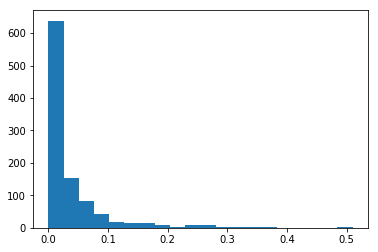

In [38]:
plt.hist(proportions, bins=20);

# Evaluation: Proportion of Top 100 Movies Shared between the ALS and Augmented Recommendations

In [39]:
cluster_distances = pd.read_csv('../data/processed/cluster_distances_df.csv', index_col='Unnamed: 0')

In [40]:
cluster_distances.head()

,0,1,2,3,4,5,6,7,8
0,0.000000,8.798096,9.716017,7.041225,6.007564,10.984834,5.646137,6.316699,6.183063
1,8.798096,0.000000,5.956857,6.540400,8.858469,4.575128,4.660669,4.302251,4.401584
2,9.716017,5.956857,0.000000,7.768660,6.161390,9.719417,5.783137,8.817718,5.600428
3,7.041225,6.540400,7.768660,0.000000,8.586475,7.407208,6.431559,6.280426,6.763831
4,6.007564,8.858469,6.161390,8.586475,0.000000,12.469241,6.062674,8.974924,5.407681


In [41]:
cm.get_nearest_clusters(cluster_distances, '8')

array([6, 1])

In [42]:
proportions = []
for i in range(len(cluster_top_100s)):
    j = preds[i]
    nearest_clusters = cm.get_nearest_clusters(cluster_distances, '{}'.format(j))
    cluster1 = nearest_clusters[0]
    cluster2 = nearest_clusters[1]
    als_set = set(als_top_100s[i].iloc[:,0])
    cluster1_set = set(cluster_top_100s[cluster1].iloc[:,0])
    cluster2_set = set(cluster_top_100s[cluster2].iloc[:,0])
    cluster_full = cluster1_set.union(cluster2_set)
    intersection = als_set.intersection(cluster_full)
    n_in_common = len(intersection)
    proportion_in_common = (n_in_common/100)
    proportions.append(proportion_in_common)

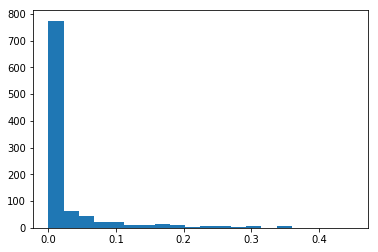

In [43]:
plt.hist(proportions, bins = 20);

# Evaluation: Distances between Movies

        - Calculate a distance matrix for the movies
        - Compare the distances between the movies in the ALS recommendation and the movies in the augmented recommendation (between group variation)
            - Shows that the within group distances are small, and
            - Shows that the between group distances are larger


In [44]:
movie_distances = cm.get_cluster_distances(item_fac)

In [75]:
movie_distances.columns = item_fac.index

In [77]:
movie_distances.index = item_fac.index

In [86]:
movie_distances.head()

id,1,2,3,4,5,6,7,8,9,10,...,192431,192491,192551,192559,192579,192697,192777,192849,193185,193243
id,,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.659943,0.794709,0.912989,0.884246,0.641788,0.677227,0.910320,1.059156,0.593580,...,1.741641,1.167652,0.901712,0.925019,1.360799,0.930302,1.148112,1.063131,2.075248,1.072819
2,0.659943,0.000000,0.261255,0.501278,0.393101,0.806566,0.417505,0.320245,0.460419,0.363693,...,1.626498,1.065402,0.552738,0.540987,0.929445,0.941761,1.096010,1.400469,2.142091,1.152650
3,0.794709,0.261255,0.000000,0.514890,0.277194,0.923487,0.480939,0.337013,0.388294,0.495208,...,1.686322,1.107492,0.705466,0.532303,0.926745,1.044446,1.137636,1.529964,2.237847,1.269069
4,0.912989,0.501278,0.514890,0.000000,0.390038,1.077467,0.434188,0.360389,0.698028,0.794689,...,1.295143,0.830129,0.848943,0.607086,1.172898,1.032247,0.863496,1.461704,2.209252,1.151558
5,0.884246,0.393101,0.277194,0.390038,0.000000,1.105320,0.379351,0.266087,0.558770,0.700429,...,1.483250,1.063782,0.848526,0.453636,1.120805,1.183639,1.111560,1.644614,2.377836,1.156615


In [114]:
MSS_distances_within = []
for i in range(len(als_top_100s)):
    within_distances = []
    for j in als_top_100s[i].iloc[:,0]:
        for k in als_top_100s[i].iloc[:,0]:
            if j == k:
                pass
            else:
                within_distances.append(movie_distances[j][k])
    sq_within_distances = [x**2 for x in within_distances]
    MSS_distances = np.mean(sq_within_distances)
    MSS_distances_within.append(MSS_distances)
    
    mean_distance = np.mean(within_distances)
    mean_distances_within.append(mean_distance)

In [113]:
MSS_distances_between = []
for i in range(len(als_top_100s)):
    between_distances = []
    for j in als_top_100s[i].iloc[:,0]:
        for k in cluster_top_100s[i].iloc[:,0]:
            between_distances.append(movie_distances[j][k])
    sq_between_distances = [x**2 for x in between_distances]
    MSS_distances = np.mean(sq_between_distances)
    MSS_distances_between.append(MSS_distances)

In [115]:
stats.ttest_ind(MSS_distances_within, MSS_distances_between, equal_var=False)

Ttest_indResult(statistic=-41.386475374352365, pvalue=2.9042267720343824e-220)

# Next Evaluation

        - Compare the distances between the ALS and augmented recommendations to the distances between the ALS and most distant movies.
            - Shows that augmented recommendations are closer to ALS recommendations than the most distant movies



# Next Steps

Change from a system where recommendations are made by cluster centroid to an average rating system.